In [15]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
# Downloading contents of the web page
url = "https://pt.wikipedia.org/wiki/Lista_de_bairros_de_Manaus"
data = requests.get(url).text

In [17]:
# Creating BeautifulSoup object
soup = BeautifulSoup(data, 'html.parser')

In [18]:
print('Classes of each table:')
for table in soup.find_all('table'):
    print(table.get('class'))


Classes of each table:
['box-Desatualizado', 'plainlinks', 'metadata', 'ambox', 'ambox-content']
['wikitable', 'sortable']
['nowraplinks', 'collapsible', 'collapsed', 'navbox-inner']


In [19]:
# Creating list with all tables
tables = soup.find_all('table')

#  Looking for the table with the classes 'wikitable' and 'sortable'
table = soup.find('table', class_='wikitable sortable')

In [20]:
# Defining of the dataframe
df = pd.DataFrame(columns=['Neighborhood', 'Zone', 'Area', 'Population', 'Density', 'Homes_count'])

# Collecting Ddata
for row in table.tbody.find_all('tr'):    
    # Find all data for each column
    columns = row.find_all('td')
    
    if(columns != []):
        neighborhood = columns[0].text.strip()
        zone = columns[1].text.strip()
        area = columns[2].span.contents[0].strip('&0.')
        population = columns[3].span.contents[0].strip('&0.')
        density = columns[4].span.contents[0].strip('&0.')
        homes_count = columns[5].span.contents[0].strip('&0.')

        df = df.append({'Neighborhood': neighborhood,  'Zone': zone, 'Area': area, 'Population': population, 'Density': density, 'Homes_count': homes_count}, ignore_index=True)

In [42]:
df


,Neighborhood,Zone,Area,Population,Density,Homes_count
0,Adrianópolis,Centro-Sul,248.45,10459,3560.88,3224
1,Aleixo,Centro-Sul,618.34,24417,3340.4,6101
2,Alvorada,Centro-Oeste,553.18,76392,11681.73,18193
3,Armando Mendes,Leste,307.65,33441,9194.86,7402
4,Betânia,Sul,52.51,1294,20845.55,3119
...,...,...,...,...,...,...
58,Tarumã,Oeste,3928.07,33168,714.27,8912
59,Tarumã-Açu,Oeste,4807.05,14249,250.74,3914
60,Vila Buriti,Sul,1004.96,216,181.8,616
61,Vila da Prata,Oeste,66.13,13052,16695.9,2933


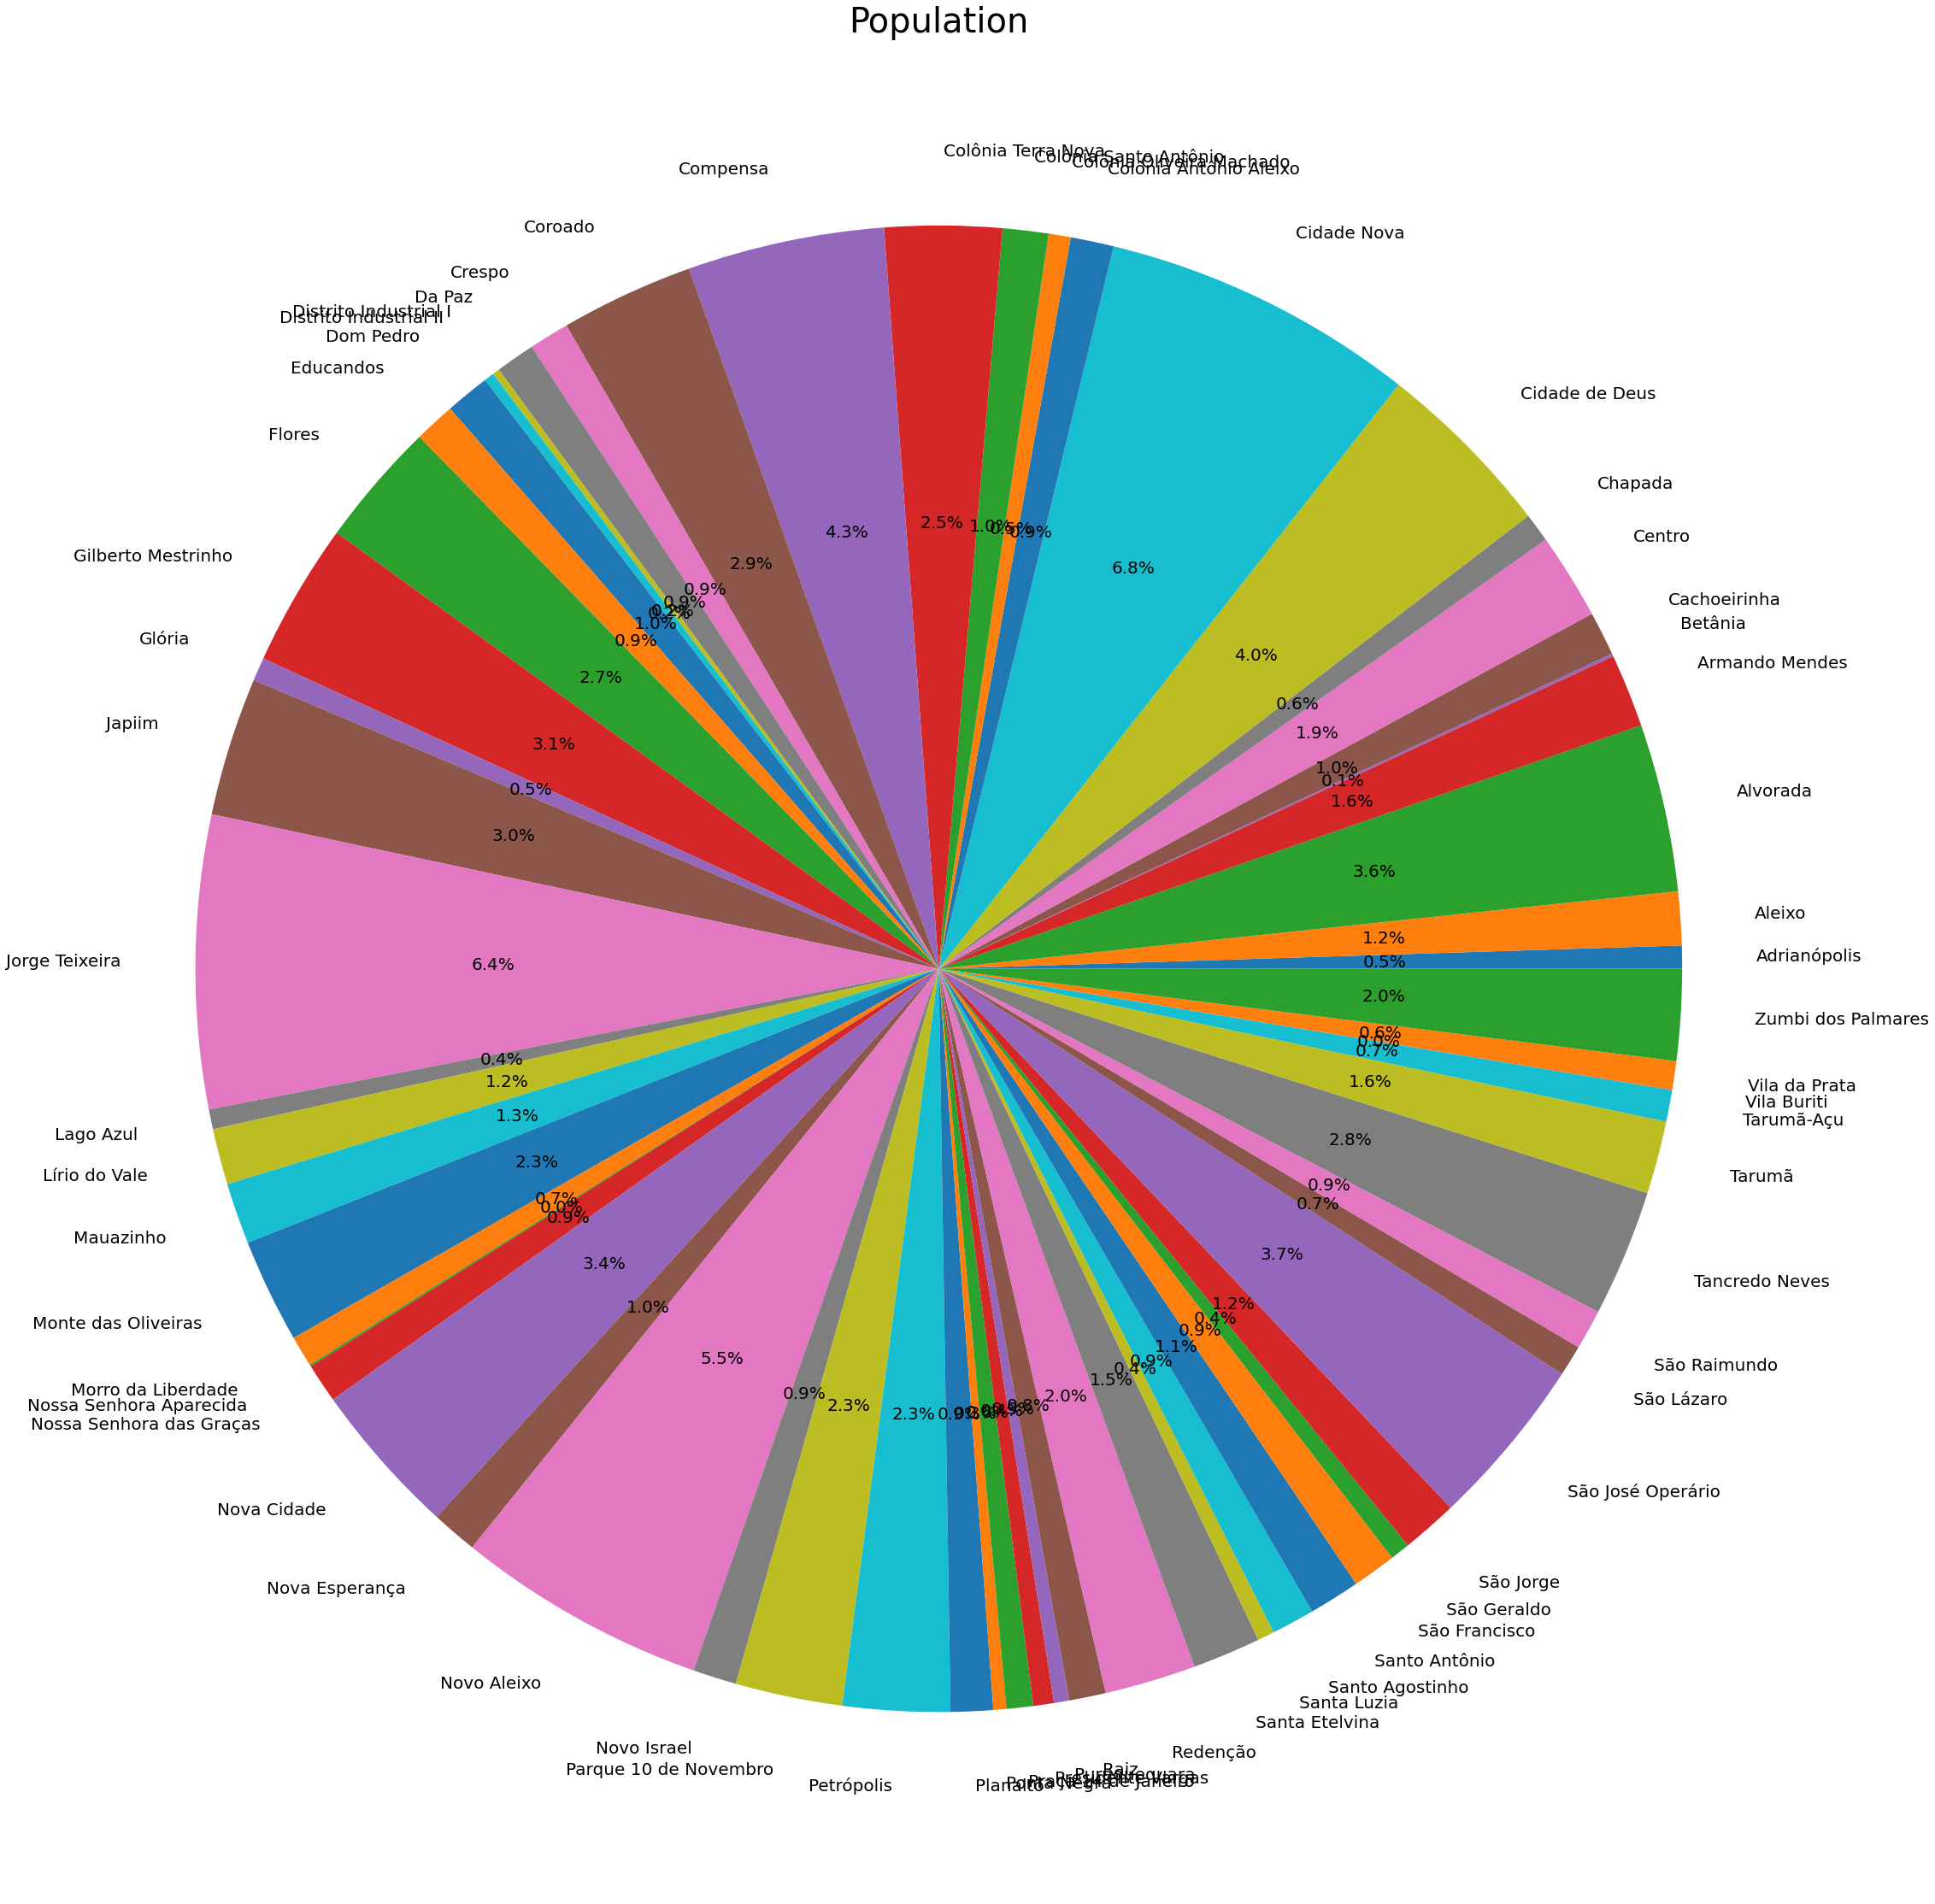

In [39]:
plt.figure(figsize=(40,40))
neigh = df['Neighborhood']
popu=df['Population']
textprops = {"fontsize":20}
plt.pie(popu, labels=neigh,autopct='%.1f%%',textprops =textprops) 
plt.title('Population',fontsize=40)
plt.show()

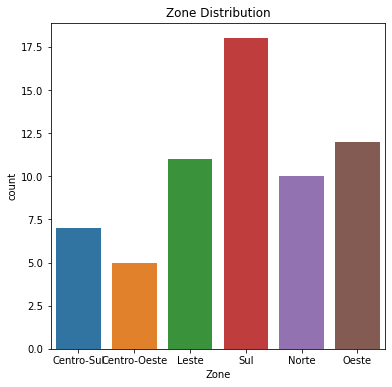

In [46]:
plt.figure(figsize=(6,6))
sns.countplot(x = 'Zone' , data=df)
plt.title('Zone Distribution')
plt.show()

C:\Users\RUSHIKESH\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


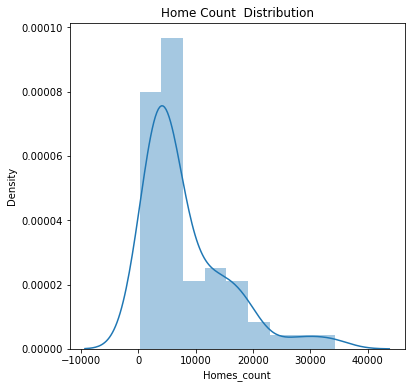

In [49]:
#Distribution of the bmi value distribution plot

plt.figure(figsize=(6,6))
sns.distplot(df['Homes_count']) 
plt.title('Home Count  Distribution')
plt.show()